A regression problem is a common type of supervised learning problem in Machine Learning. The end goal is to predict quantitative values – for example, continuous values such as the price of a car.

A useful dataset for price prediction, this vehicle dataset includes information about cars and motorcycles listed on CarDekho.com. The data is in a CSV file which includes the following columns: model, year, selling price, showroom price, kilometers driven, fuel type, seller type, transmission, and number of previous owners.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving car_data.csv to car_data.csv


In [ ]:
car_data=pd.read_csv('car_data.csv')
car_data.shape

(301, 9)

In [ ]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [ ]:
car_data['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [ ]:
car_data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
car_data['Owner'].unique()

array([0, 1, 3])

In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
car_data.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


In [ ]:
car_data_missing=car_data.isnull()

In [ ]:
car_data_missing.sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Text(0.5, 1.0, 'Heatmap for correlation between columns of car_data')

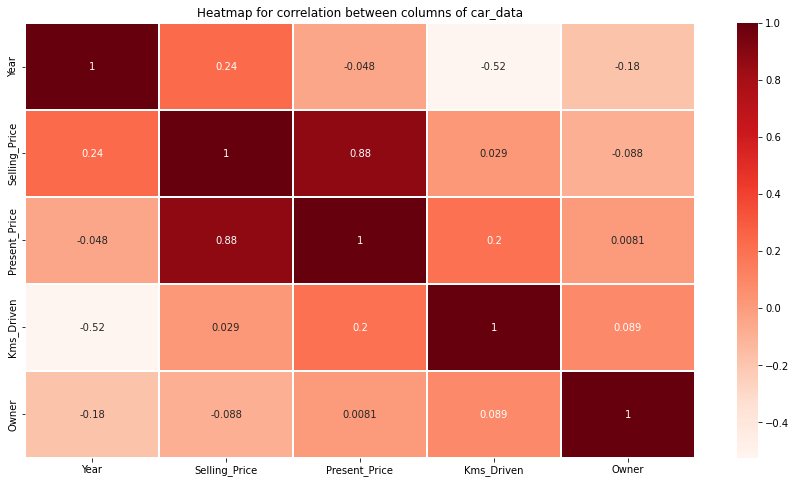

In [ ]:
plt.figure(figsize=(15,8)) 

sns.heatmap(car_data.corr(),linewidths=1,cmap=plt.cm.Reds, annot=True);
plt.title('Heatmap for correlation between columns of car_data')

In [ ]:
#Heatmap correlation analysis
#Dark color represents a positive correlation,
#Light color/ white is a towards the negative correlation.

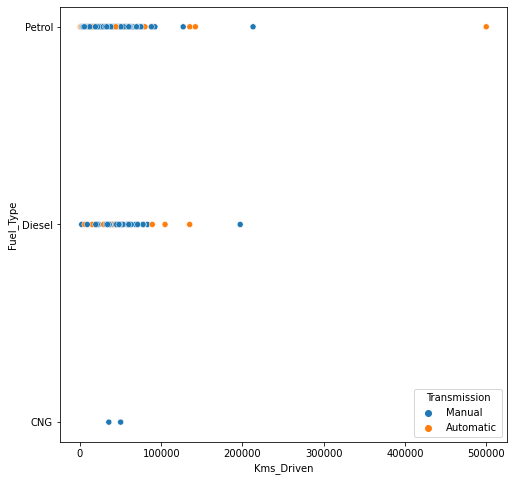

In [ ]:
plt.figure(figsize=(8,8))

sns.scatterplot(data =car_data, x = "Kms_Driven", y ="Fuel_Type", hue="Transmission");

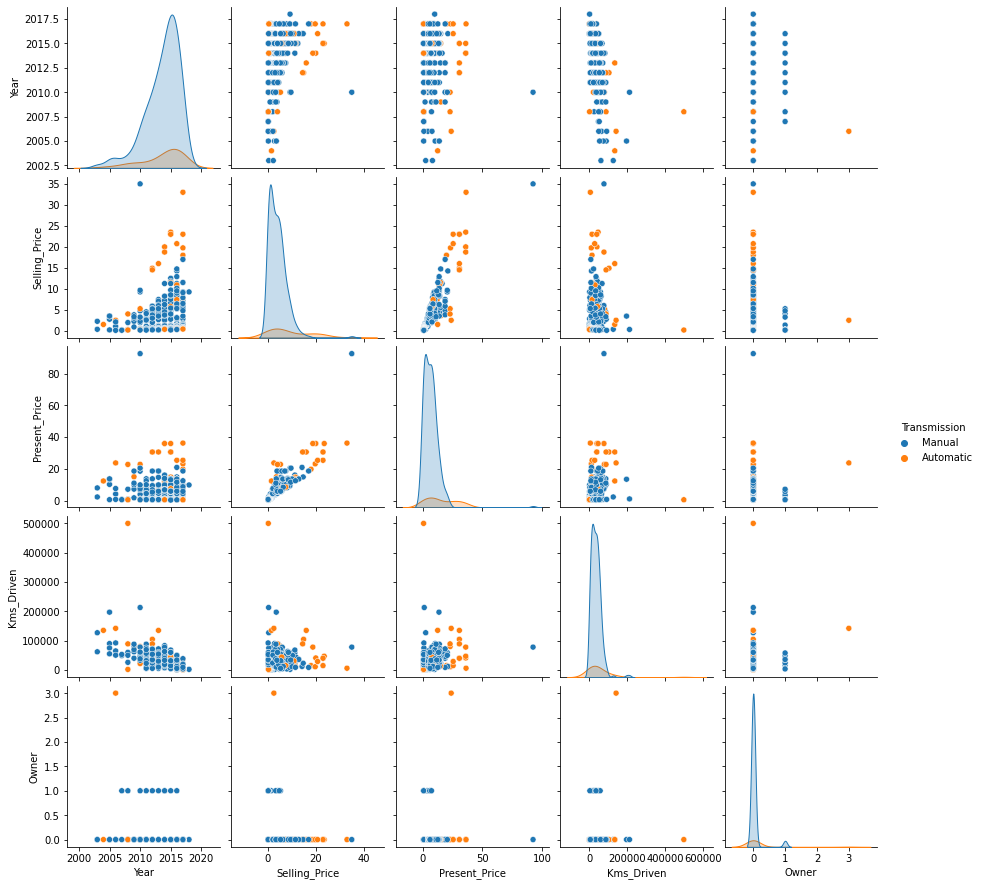

In [ ]:
sns.pairplot(car_data,hue='Transmission')

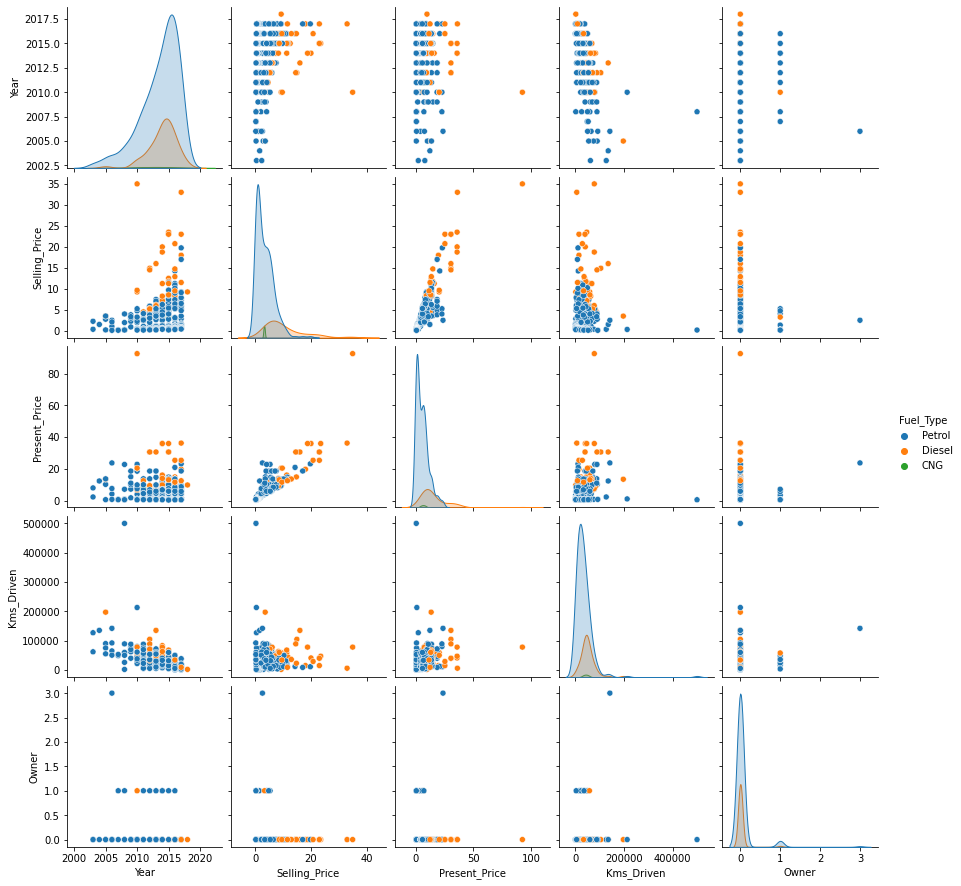

In [ ]:
sns.pairplot(car_data,hue='Fuel_Type')

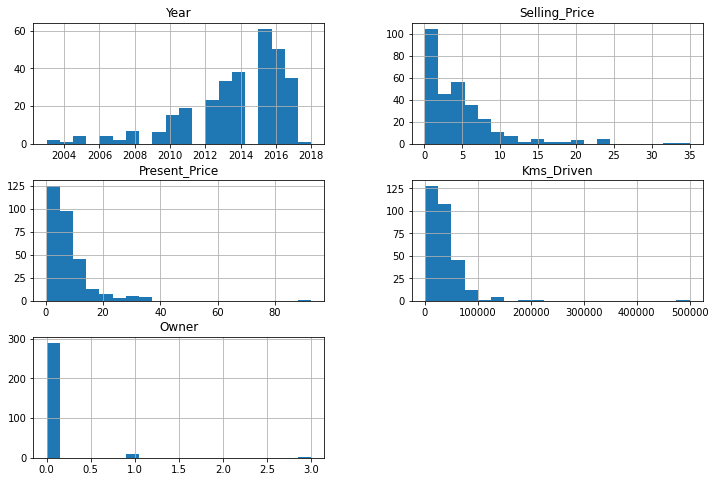

In [ ]:
car_data.hist(figsize=(12,8),bins=20)
plt.show()

In [ ]:
x=car_data.drop(['Car_Name','Owner','Present_Price'],axis=1)

In [ ]:
x

,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,2014,3.35,27000,Petrol,Dealer,Manual
1,2013,4.75,43000,Diesel,Dealer,Manual
2,2017,7.25,6900,Petrol,Dealer,Manual
3,2011,2.85,5200,Petrol,Dealer,Manual
4,2014,4.60,42450,Diesel,Dealer,Manual
...,...,...,...,...,...,...
296,2016,9.50,33988,Diesel,Dealer,Manual
297,2015,4.00,60000,Petrol,Dealer,Manual
298,2009,3.35,87934,Petrol,Dealer,Manual
299,2017,11.50,9000,Diesel,Dealer,Manual


In [ ]:
x['Fuel_Type'].replace(['Petrol', 'Diesel','CNG'],
                        [0,1,2], inplace=True)

In [ ]:
x['Seller_Type'].replace(['Dealer', 'Individual'],
                        [0, 1], inplace=True)

In [ ]:
x['Transmission'].replace(['Manual', 'Automatic'],
                        [0, 1], inplace=True)

In [ ]:
x['Transmission']

0      0
1      0
2      0
3      0
4      0
      ..
296    0
297    0
298    0
299    0
300    0
Name: Transmission, Length: 301, dtype: int64

In [ ]:
y=car_data['Present_Price']

In [ ]:
y

0       5.59
1       9.54
2       9.85
3       4.15
4       6.87
       ...  
296    11.60
297     5.90
298    11.00
299    12.50
300     5.90
Name: Present_Price, Length: 301, dtype: float64

Application of linear regression on the dataset and to measure the error and accuracy related to it.It has been shown about the model accuracy on both train and test dataset.
three different error metrics has been shown below.

In [ ]:
#Create Object to call linear regression model
regressor=LinearRegression()

In [ ]:
#Split the train and test data to validate the whole dataset
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((210, 6), (210,), (91, 6), (91,))

In [ ]:
#Apply scaling technique of standard scaler to the model
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [ ]:
#Fit the model 
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
print('The intercept',regressor.intercept_)

The intercept 7.40570952380949


In [ ]:
print('The coefficient',regressor.coef_)

The coefficient [-2.11297268  8.64916541  0.37124449 -0.46803137  0.1562315  -0.21535203]


In [ ]:
y_lr=regressor.predict(x_test)

In [ ]:
print(y_lr)

[-1.95714136e+00  1.53314304e+01  8.61319359e+00  2.16864397e+00
  1.22815249e+01  1.06102887e+01  7.97174087e-01  3.30288046e-01
 -1.18032021e+00  8.83962580e+00  1.11873205e+01  2.33403671e+00
  1.15959476e+01 -2.80598080e+00  9.83936796e+00  4.98852003e+00
  2.62222457e+00  2.66027464e+01 -1.91297073e+00  1.54110750e-01
  9.63416452e-01  1.12434094e+01  9.06979145e+00  6.68633445e+00
  6.53361843e-01  7.38889858e+00  9.02293086e+00  6.27617055e+00
 -6.34976675e-01  1.64025308e-01  1.39990603e+00  1.29250692e+01
  3.36039184e+00  7.39865586e+00  1.04017200e+01  5.73858962e+00
  1.00294980e+01  9.92560524e+00  5.35814428e+00  1.07415138e+01
  1.24842917e+01  9.54877548e+00  7.08283327e+00  4.87590132e-01
  8.87363693e+00  1.45236383e+00  1.03226423e+01  1.11869083e+01
  7.04383476e+00  5.31459861e+00  8.34631607e+00 -4.33363047e-01
  3.79825002e+01  3.53543372e+01  1.21730675e+01  1.61938017e+01
  7.96412965e+00  1.33782893e+01  9.07036577e+00  9.94615394e+00
  9.11131827e-01  4.47820

In [ ]:
#Evaluate the root mean square error 
rmse=np.sqrt(mean_squared_error(y_test,y_lr))
print("The accuracy of our model is {}".format(round(rmse, 2)))

The accuracy of our model is 3.08


In [ ]:
#Evaluate the mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_lr)
print("The Mean Absolute Error of our Model is {}".format(round(mae, 2)))

The Mean Absolute Error of our Model is 2.1


In [ ]:
#Evaluate the r2_score 
r2_score=r2_score(y_test,y_lr)
print("The r2 score of our Model is {}".format(round(r2_score, 2)))

The r2 score of our Model is 0.85


In [ ]:
print(regressor.score(x_train, y_train))
print(regressor.score(x_test, y_test))

0.8376125661897145
0.8526870140835113


In [ ]:
# training the dataset
from sklearn.tree import DecisionTreeRegressor
regrassor = DecisionTreeRegressor(max_depth=3,min_samples_split = 2,random_state = 0)
regrassor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [ ]:
# predictzing the result
y_dt= regrassor.predict(x_test)

In [ ]:
print(y_dt)

[ 0.80507018 13.17515152  7.68625     0.80507018  7.68625    13.17515152
  2.179375    0.80507018  0.80507018  7.68625    13.17515152  2.179375
 13.17515152  0.80507018  7.68625     7.68625     0.80507018 36.23
  0.80507018  2.179375    0.80507018 13.17515152  7.68625     7.68625
  0.80507018  7.68625     7.68625     7.68625     2.179375    2.179375
  0.80507018 13.17515152  0.80507018  2.179375   13.17515152  7.68625
  7.68625     7.68625     7.68625     7.68625     7.68625     2.179375
  7.68625     0.80507018  7.68625     0.80507018  7.68625     7.68625
  7.68625     7.68625     7.68625     2.179375   28.825      28.825
 13.17515152 13.17515152  7.68625    13.17515152  7.68625    13.17515152
  0.80507018  0.80507018  0.80507018  0.80507018  7.68625     2.179375
 28.825      28.825       7.68625     0.80507018  7.68625     7.68625
  7.68625     7.68625     2.179375    2.179375    0.80507018 13.17515152
  0.80507018 13.17515152  7.68625     7.68625     7.68625    28.825
  7.68625     

In [ ]:
#Evaluate the root mean square error 
rmse_dt=np.sqrt(mean_squared_error(y_test,y_dt))
print("The accuracy of our model is {}".format(round(rmse_dt, 2)))

The accuracy of our model is 4.47


In [ ]:
#Evaluate the  mean square error 
mae_dt=mean_absolute_error(y_test,y_dt)
print("The accuracy of our model is {}".format(round(mae_dt,2)))

The accuracy of our model is 2.55


In [ ]:
from sklearn import tree

In [ ]:
text_representation = tree.export_text(regrassor)
print(text_representation)

|--- feature_1 <= 2.07
|   |--- feature_1 <= -0.50
|   |   |--- feature_1 <= -0.72
|   |   |   |--- value: [0.81]
|   |   |--- feature_1 >  -0.72
|   |   |   |--- value: [2.18]
|   |--- feature_1 >  -0.50
|   |   |--- feature_1 <= 0.48
|   |   |   |--- value: [7.69]
|   |   |--- feature_1 >  0.48
|   |   |   |--- value: [13.18]
|--- feature_1 >  2.07
|   |--- feature_1 <= 5.94
|   |   |--- feature_2 <= -0.64
|   |   |   |--- value: [36.23]
|   |   |--- feature_2 >  -0.64
|   |   |   |--- value: [28.83]
|   |--- feature_1 >  5.94
|   |   |--- value: [92.60]



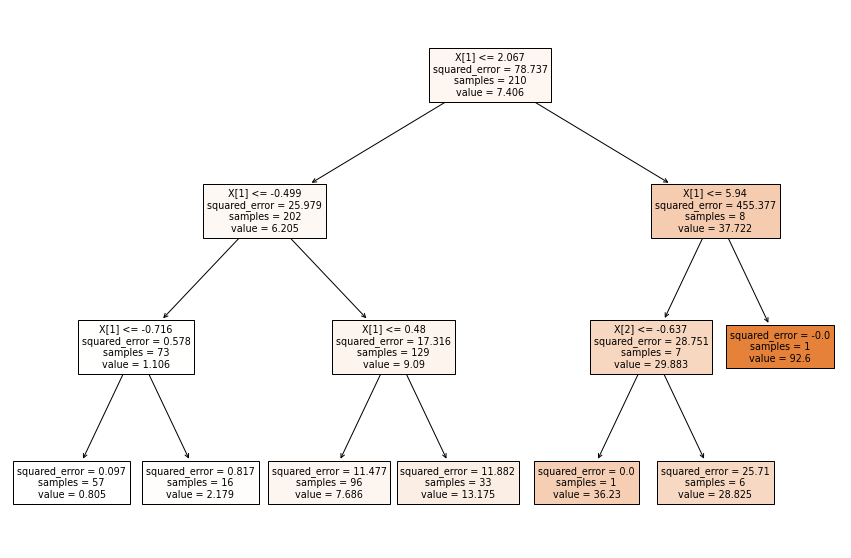

In [ ]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(regrassor,filled=True)


In [ ]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
ran_regressor = RandomForestRegressor(n_estimators =10,max_features ='sqrt',max_depth =5,random_state =0)
ran_regressor.fit(x_train,y_train)
y_ran_pred = ran_regressor.predict(x_test)
print(' All possible output gained by randomforest regressor model:\n',y_ran_pred)  

 All possible output gained by randomforest regressor model:
 [ 0.7029155  10.34620001  9.5651621   1.00180724 10.45491881  9.61977123
  1.37316081  0.87721975  0.88675521  9.68809005 10.35085203  1.33286381
  9.17071662  0.72447003  9.68809005  7.04724456  1.28272005 14.20635291
  0.86764482  1.41537747  0.84645821 10.35085203  8.82859319  6.54879554
  0.83986045  8.03285652  8.29344422  6.15955124  1.50837747  1.38451081
  0.90396633 12.69302529  0.79302947  6.00163735  9.99016845  7.3946987
 10.08680977  8.23612233  7.38539949  7.9999509  10.30509084 13.049672
  7.51707777  0.99848963  8.82859319  0.83986045  8.4950714  19.08799084
  8.03285652  8.72341029  7.89162333  1.41537747 32.33955556 26.77855556
 12.69302529  9.71463328  7.51707777 10.59702411  6.30051127  9.68629995
  0.80717663  0.79302947  0.92515294  0.81715227  7.84755981  1.52748786
 32.35255556 32.33955556  7.83396182  4.68477397  8.72341029  8.68011215
  7.84755981  7.25327437  4.96188043  1.54068434  0.92515294 12.2

In [ ]:
print(ran_regressor.score(x_train,y_train))
print(ran_regressor.score(x_test,y_test))

0.911435286801922
0.9019060798738835


In [ ]:
#Evaluate the root mean square error 
rmse_ran=np.sqrt(mean_squared_error(y_test,y_ran_pred))
print("The accuracy of randomized model is {}".format(round(rmse_ran, 2)))

The accuracy of randomized model is 2.51


In [ ]:
#Evaluate the  mean square error 
mae_ran=mean_absolute_error(y_test,y_ran_pred)
print("The accuracy of our model is {}".format(round(mae_ran,2)))

The accuracy of our model is 1.51


In [ ]:
def MAPE(y_test,ran_pred):
    mape = np.mean(np.abs((y_test -ran_pred)/y_test))*100
    return mape
MAPE= MAPE(y_test,y_ran_pred)
print("MAPE: ",MAPE)
accuracy = 100 -MAPE
accuracy

MAPE:  28.466027930928128


71.53397206907187

Model Improvement trail by using hyperparameter tuning on RandomForestRegressor

In [ ]:
#Random Search with Cross Validation
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop =1000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]


# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


In [ ]:
# Use the random grid to search for best hyperparameters
#create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv =10, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(x_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': True}

In [ ]:
rf_random.cv_results_

{'mean_fit_time': array([1.60502238, 1.41850731, 2.45733657, 0.3377172 , 1.95345895,
        1.65130343, 0.5329284 , 1.57741177, 0.36888089, 0.58733304,
        1.26625955, 1.37243781, 1.38660064, 0.79645729, 0.26840022,
        1.14162326, 0.12244678, 0.8648288 , 0.85195956, 1.85342841,
        0.8416625 , 0.13727875, 0.31437242, 0.95335672, 0.13581762,
        0.16984224, 1.32140214, 0.15628662, 0.97306154, 0.93453732,
        0.34698844, 0.95189388, 0.34366028, 1.36803236, 0.88348856,
        0.12872665, 0.49432957, 0.1201128 , 1.10176461, 0.25491955,
        0.55226343, 0.15224192, 0.53036752, 0.17004273, 1.52454989,
        1.26385539, 0.8558038 , 0.16987391, 1.63240268, 1.28165994,
        1.75327847, 0.53254037, 1.48302827, 1.62577951, 1.1171128 ,
        1.51819859, 1.26843991, 1.49337049, 0.49138796, 1.70723956,
        0.12477837, 0.8146385 , 1.67125452, 0.95612898, 0.27508252,
        0.9968832 , 1.41557796, 1.02268748, 0.12757912, 0.51809444,
        0.51511695, 0.51327488,

GradientBoostingRegressor as a Machine Learning model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbr_params = {'n_estimators':100,
          'max_depth':5,
          'min_samples_split':2,
          'learning_rate': 0.01,
          'loss':'squared_error'}
# Create an instance of gradient boosting regressor
gbr = GradientBoostingRegressor(**gbr_params)
# Fit the model
gbr.fit(x_train, y_train)
# Print Coefficient of determination R^2
accuracy_score=gbr.score(x_test, y_test)
mse = mean_squared_error(y_test, gbr.predict(x_test))
print('training model accuracy is:',gbr.score(x_train, y_train))
print('model accuracy is:',accuracy_score)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

training model accuracy is: 0.8512019909946282
model accuracy is: 0.715300320738356
The mean squared error (MSE) on test set: 18.2925


**Model analysis using deep learning module Keras**

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install q keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from math import sqrt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
# Define model
model = Sequential()
model.add(Dense(500, input_dim=6, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))
#model.summary() #Print model Summary

In [ ]:
model.compile(loss= "mean_squared_error",optimizer="adam",metrics=["mean_squared_error"])
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
7/7 [==============================] - 0s 3ms/step - loss: 1.0213 - mean_squared_error: 1.0213
Epoch 2/50
7/7 [==============================] - 0s 3ms/step - loss: 0.9230 - mean_squared_error: 0.9230
Epoch 3/50
7/7 [==============================] - 0s 3ms/step - loss: 0.8119 - mean_squared_error: 0.8119
Epoch 4/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5741 - mean_squared_error: 0.5741
Epoch 5/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5830 - mean_squared_error: 0.5830
Epoch 6/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5495 - mean_squared_error: 0.5495
Epoch 7/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5619 - mean_squared_error: 0.5619
Epoch 8/50
7/7 [==============================] - 0s 4ms/step - loss: 0.7070 - mean_squared_error: 0.7070
Epoch 9/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5731 - mean_squared_error: 0.5731
Epoch 10/50
7/7 [=============================

In [ ]:
pred_train= model.predict(x_train)

print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred= model.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred))) 

7/7 [==============================] - 0s 2ms/step
0.6792106882048433
3/3 [==============================] - 0s 3ms/step
1.9295481677930713
